[0.99688106 0.07891865]
0.9248427304699945 [25.80653638  1.6553034 ]


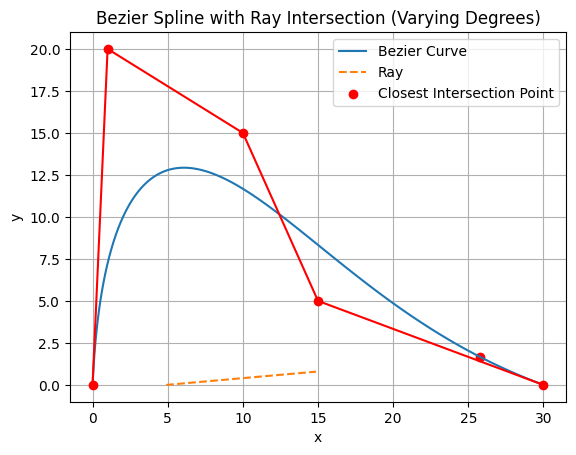

Closest intersection at t=0.9248427304699945 with point [25.80653638  1.6553034 ]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Function to evaluate a Bezier curve using De Casteljau's algorithm
def de_casteljau(t, control_points):
    n = len(control_points) - 1
    points = np.copy(control_points)
    for r in range(1, n + 1):
        for i in range(n - r + 1):
            points[i] = (1 - t) * points[i] + t * points[i + 1]
    return points[0]

# Function to find the distance to the ray
def distance_to_ray(t, control_points, ray_start, ray_dir):
    bezier_point = de_casteljau(t, control_points)
    t_ray = np.dot(bezier_point - ray_start, ray_dir) / np.dot(ray_dir, ray_dir)
    ray_point = ray_start + t_ray * ray_dir
    return np.linalg.norm(bezier_point - ray_point)

def find_intersections(control_points, ray_start, ray_dir, tolerance=1e-5, num_guesses=10):
    t_values = np.linspace(0, 1, num_guesses)
    intersections = []
    
    def refine_intersection(t_guess):
        t = t_guess
        for _ in range(10):  # Limit the number of iterations
            dist = distance_to_ray(t, control_points, ray_start, ray_dir)
            if dist < tolerance:
                return t
            grad = (distance_to_ray(t + tolerance, control_points, ray_start, ray_dir) - dist) / tolerance
            if abs(grad) < 1e-10:  # Avoid division by zero
                break
            t -= dist / grad
            t = max(0, min(1, t))  # Clamp t to [0, 1]
        return t
    
    i = 0
    for t_guess in t_values:
        t_intersection = refine_intersection(t_guess)
        if 0 <= t_intersection <= 1:
            distance = distance_to_ray(t_intersection, control_points, ray_start, ray_dir)
            if distance < tolerance:
                intersections.append((t_intersection, distance))
        i += 1
    
    # Remove duplicate intersections
    intersections = list({round(t, 6): t for t, _ in intersections}.values())
    intersections.sort()

    return intersections

# Define control points (example with 6 control points)
control_points = np.array([
    [0.0, 0.0],
    [1.0, 20],
    [10, 15],
    [15, 5],
    [30, 0]
])

# Ray definition (start point and direction)
ray_start = np.array([4.8971480515183279, 0])
ray_dir = np.array([63.131642848253236,
                    4.9978517366958215])

# Normalize ray direction
ray_dir = ray_dir / np.linalg.norm(ray_dir)

print(ray_dir)

# Find all intersections
intersections = find_intersections(control_points, ray_start, ray_dir)

# Get the closest intersection
if intersections:
    closest_intersection_t = intersections[0]
    closest_intersection_point = de_casteljau(closest_intersection_t, control_points)
else:
    closest_intersection_t = None
    closest_intersection_point = None

print(closest_intersection_t, closest_intersection_point)

# Generate the Bezier curve points
t_values = np.linspace(0, 1, 100)
curve_points = np.array([de_casteljau(t, control_points) for t in t_values])

# Plotting
plt.figure()
plt.plot(curve_points[:, 0], curve_points[:, 1], label='Bezier Curve')
plt.plot([ray_start[0], ray_start[0] + 10 * ray_dir[0]], [ray_start[1], ray_start[1] + 10 * ray_dir[1]], label='Ray', linestyle='--')

if closest_intersection_point is not None:
    plt.scatter(*closest_intersection_point, color='red', label='Closest Intersection Point')
else:
    print("No valid intersection found.")

# Plot control points and lines between them
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-')

# Labels and title
plt.title('Bezier Spline with Ray Intersection (Varying Degrees)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

if closest_intersection_t is not None:
    print(f"Closest intersection at t={closest_intersection_t} with point {closest_intersection_point}")
else:
    print("No valid intersection found.")


In [6]:
# Get normal from 3 points

def get_normal(p1, p2, p3):
    v1 = p2 - p1
    v2 = p3 - p1
    normal = np.cross(v1, v2)
    return normal / np.linalg.norm(normal)

print(get_normal(np.array([0, 0, 30.000000000000000])
                 , np.array([0, 0, 0.0000000000000000])
                 , np.array([0, 0, -79.108699911410781])))

[nan nan nan]


C:\Users\timmi\AppData\Local\Temp\ipykernel_58464\3565015802.py:7: RuntimeWarning: invalid value encountered in divide
  return normal / np.linalg.norm(normal)


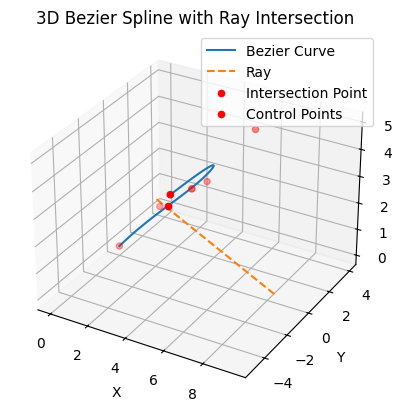

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D

# Function to evaluate a 3D Bezier curve
def de_casteljau_3d(t, control_points):
    n = len(control_points) - 1
    points = np.copy(control_points)
    for r in range(1, n + 1):
        for i in range(n - r + 1):
            points[i] = (1 - t) * points[i] + t * points[i + 1]
    return points[0]

# Function to find the intersection
def find_intersection_3d(t, control_points, ray_start, ray_dir):
    bezier_point = de_casteljau_3d(t, control_points)
    t_ray = np.dot(bezier_point - ray_start, ray_dir) / np.dot(ray_dir, ray_dir)
    ray_point = ray_start + t_ray * ray_dir
    return np.linalg.norm(bezier_point - ray_point)

# Rotate control points around an axis
def rotate_points(points, angle, axis):
    rotation_matrix = rotation_matrix_3d(angle, axis)
    return np.dot(points, rotation_matrix)

# Rotation matrix for 3D points around an axis
def rotation_matrix_3d(angle, axis):
    axis = axis / np.linalg.norm(axis)
    a = np.cos(angle / 2)
    b, c, d = -axis * np.sin(angle / 2)
    return np.array([
        [a*a + b*b - c*c - d*d, 2*(b*c - a*d), 2*(b*d + a*c)],
        [2*(b*c + a*d), a*a + c*c - b*b - d*d, 2*(c*d - a*b)],
        [2*(b*d - a*c), 2*(c*d + a*b), a*a + d*d - b*b - c*c]
    ])

# Define control points for the 3D Bezier curve
control_points_3d = np.array([
    [0.0, 0.0, 0.0],
    [1.0, 2.0, 1.0],
    [3.0, 3.0, 2.0],
    [4.0, 0.0, 3.0],
    [5.0, 4.0, 4.0],
    [6.0, -5.0, 5.0]
])

# Define ray parameters
ray_start = np.array([0.5, 2.5, 1.0])
ray_dir = np.array([1.0, -0.5, 0.0])
ray_dir = ray_dir / np.linalg.norm(ray_dir)

# Rotate the control points around the axis formed by the first and last control points
axis = control_points_3d[-1] - control_points_3d[0]
angle = 2 * np.pi  # Rotate 360 degrees
control_points_3d_rotated = rotate_points(control_points_3d, angle, axis)

# Find the intersection using fsolve
t_intersection = fsolve(find_intersection_3d, 0.5, args=(control_points_3d_rotated, ray_start, ray_dir))[0]

# Calculate intersection point
intersection_point = de_casteljau_3d(t_intersection, control_points_3d_rotated)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D Bézier spline
t_values = np.linspace(0, 1, 100)
curve_points = np.array([de_casteljau_3d(t, control_points_3d_rotated) for t in t_values])
ax.plot(curve_points[:, 0], curve_points[:, 1], curve_points[:, 2], label='Bezier Curve')

# Plot the ray
ray_end = ray_start + 10 * ray_dir
ax.plot([ray_start[0], ray_end[0]], [ray_start[1], ray_end[1]], [ray_start[2], ray_end[2]], label='Ray', linestyle='--')

# Plot the intersection point
ax.scatter(intersection_point[0], intersection_point[1], intersection_point[2], color='red', label='Intersection Point')

# Plot control points
ax.scatter(control_points_3d_rotated[:, 0], control_points_3d_rotated[:, 1], control_points_3d_rotated[:, 2], c='r', marker='o', label='Control Points')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Bezier Spline with Ray Intersection')
ax.legend()

plt.show()


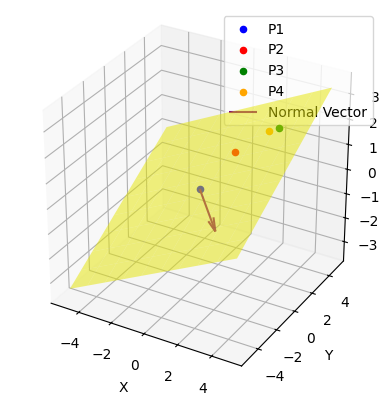

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate the plane basis
def calculate_plane_basis(normal):
    # Ensure the normal vector is normalized
    normal = normal / np.linalg.norm(normal)
    
    # Choose an arbitrary vector that is not parallel to the normal vector
    arbitrary_vector = np.array([1, 0, 0]) if not np.allclose(normal, [1, 0, 0]) else np.array([0, 1, 0])
    
    # Compute u (orthogonal to normal)
    u = arbitrary_vector - np.dot(arbitrary_vector, normal) * normal
    u = u / np.linalg.norm(u)
    
    # Compute v (orthogonal to both normal and u)
    v = np.cross(normal, u)
    
    return u, v

# Function to project a point onto a plane
def project_point_onto_plane(point, plane_point, u, v):
    w = point - plane_point
    u_coord = np.dot(w, u)
    v_coord = np.dot(w, v)
    return np.array([u_coord, v_coord])

# Define four points
P1 = np.array([0.0, 0.0, 0.0])
P2 = np.array([1.0, 2.0, 1.0])
P3 = np.array([3.0, 3.0, 2.0])
P4 = np.array([4.0, 0.0, 3.0])

# Calculate the normal vector from the first three points
v1 = P2 - P1
v2 = P3 - P1
normal_vector = np.cross(v1, v2)
normal_vector /= np.linalg.norm(normal_vector)

# Calculate the plane basis vectors u and v
u, v = calculate_plane_basis(normal_vector)

# Project points onto the plane
projected_P2 = project_point_onto_plane(P2, P1, u, v)
projected_P3 = project_point_onto_plane(P3, P1, u, v)
projected_P4 = project_point_onto_plane(P4, P1, u, v)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original points
ax.scatter(*P1, color='blue', label='P1')
ax.scatter(*P2, color='red', label='P2')
ax.scatter(*P3, color='green', label='P3')
ax.scatter(*P4, color='orange', label='P4')

# Plot the plane
plane_size = 5
plane_x, plane_y = np.meshgrid(np.linspace(-plane_size, plane_size, 10), np.linspace(-plane_size, plane_size, 10))
plane_z = (-normal_vector[0] * plane_x - normal_vector[1] * plane_y) / normal_vector[2]
ax.plot_surface(plane_x, plane_y, plane_z, alpha=0.5, color='yellow')

# Plot the normal vector
ax.quiver(*P1, *normal_vector, length=2, color='purple', label='Normal Vector')

# Set plot labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Set aspect ratio for equal scaling
ax.set_box_aspect([1, 1, 1])

# Display plot
plt.show()


In [23]:
P1 = np.array([0.0, 0.0, 4.0])
P2 = np.array([1.0, 1.0, 0.0])
axis = np.array([0.0, 0.0, 1.0])

# Calculate distance from P1 to P2 on axis
distance = np.dot(P2 - P1, axis)
print(f"Distance from P1 to P2 along the axis: {distance}")

Distance from P1 to P2 along the axis: -4.0
